In [1]:
#设置所有分类目录的名称
import os

base_dir = 'E:\python projects\cats_and_dogs'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [2]:
#得到数据集的大小
print(len(os.listdir(train_cats_dir)), len(os.listdir(train_dogs_dir)),len(os.listdir(validation_cats_dir)),len(os.listdir(validation_dogs_dir)))

1000 1000 500 500


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

nrows = 4
ncols = 4

pic_index = 0

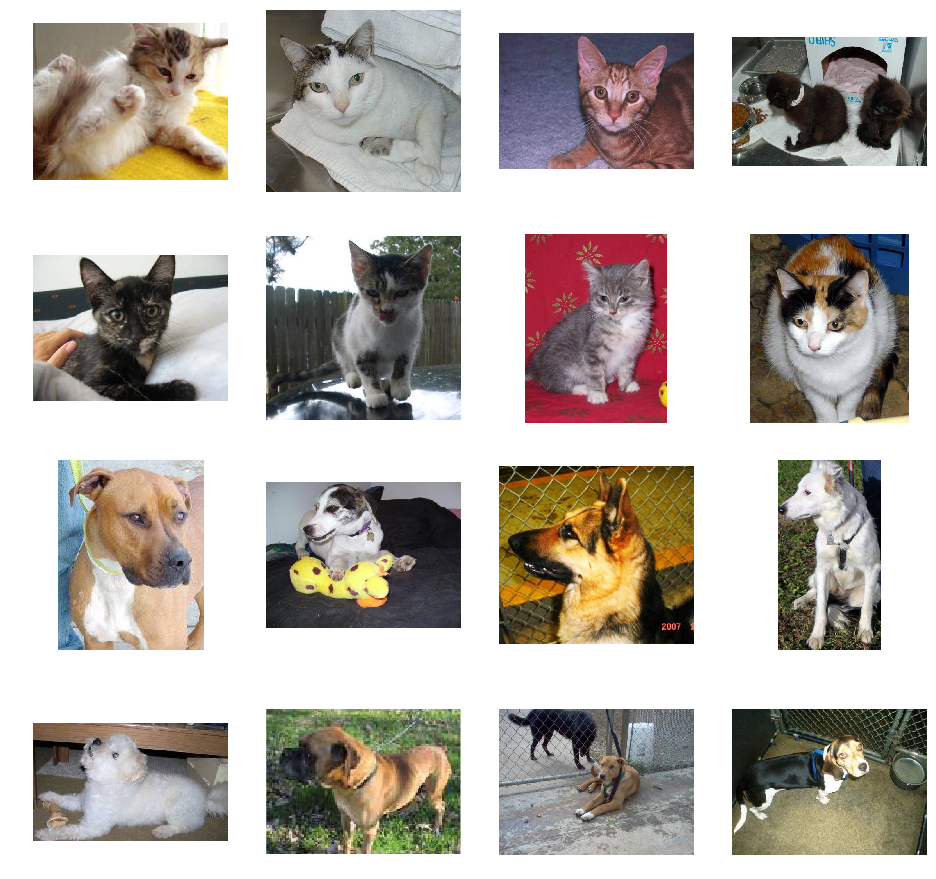

In [21]:
#显示部分数据集图片
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [5]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [6]:
#构建卷积神经网络模型
img_input = layers.Input(shape=(150,150,3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [7]:
#最后加上全连接层和分类层
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)

output = layers.Dense(1, activation='sigmoid')(x)

model = Model(img_input, output)

In [8]:
#查看网络结构
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
__________

In [9]:
#设置损失函数、优化器（含步长）和性能评估函数，并编译进模型
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['acc'])

In [10]:
#模型建完，开始准备数据。分别为训练集和测试集创建数据生成器，并设置生成器的参数，用于为模型连续生成标准化的数据。
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)#实例化，可设置对单张图片的操作属性（缩放、剪切、拉伸等）
test_datagen = ImageDataGenerator(rescale=1./255)
#用实例的方法构建生成器，设置的是生成流程的属性（目录、统一尺寸、batch数、分类类别等）
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
#用准备好的模型和生成器进行训练。
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=15, validation_data=validation_generator, validation_steps=50, verbose=2)

Epoch 1/15
 - 96s - loss: 7.6648 - acc: 0.4935 - val_loss: 0.6933 - val_acc: 0.4890
Epoch 2/15
 - 93s - loss: 0.7133 - acc: 0.5855 - val_loss: 0.6623 - val_acc: 0.6630
Epoch 3/15
 - 89s - loss: 0.6255 - acc: 0.6775 - val_loss: 0.5834 - val_acc: 0.7030
Epoch 4/15
 - 90s - loss: 0.5634 - acc: 0.7175 - val_loss: 0.5679 - val_acc: 0.7090
Epoch 5/15
 - 98s - loss: 0.4872 - acc: 0.7715 - val_loss: 0.7499 - val_acc: 0.5900
Epoch 6/15
 - 98s - loss: 0.4093 - acc: 0.8185 - val_loss: 0.5837 - val_acc: 0.7410
Epoch 7/15
 - 100s - loss: 0.3343 - acc: 0.8510 - val_loss: 0.6980 - val_acc: 0.6990
Epoch 8/15
 - 95s - loss: 0.2644 - acc: 0.8815 - val_loss: 0.7089 - val_acc: 0.7280
Epoch 9/15
 - 92s - loss: 0.1704 - acc: 0.9325 - val_loss: 0.8048 - val_acc: 0.7270
Epoch 10/15
 - 87s - loss: 0.1218 - acc: 0.9535 - val_loss: 1.1151 - val_acc: 0.7250
Epoch 11/15
 - 84s - loss: 0.0927 - acc: 0.9635 - val_loss: 1.1793 - val_acc: 0.7100
Epoch 12/15
 - 85s - loss: 0.0685 - acc: 0.9770 - val_loss: 1.4152 - val_

In [ ]:
#用训练好的模型随机预测一张图片，并将每一层的输出进行可视化，用于观察各层对图像的抽象和提取效果。
import numpy as np
#olderr = np.seterr(all='ignore')
#numpy.seterr(divide='ignore', invalid='ignore')
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)#用新定义的输出重新构建模型，该模型包含已训练好的卷积网络参数。

cat_pics = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_pics = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_chosen = random.choice(cat_pics + dog_pics)

img = load_img(img_chosen, target_size=(150, 150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
x /= 255

successsive_feature_maps = visualization_model.predict(x)#该模型无需训练，直接可以进行预测。

layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successsive_feature_maps):
    if len(feature_map.shape) == 4:#如果该层是卷积层
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        display_grid = np.zeros((size, size*n_features))
        
        for i in range(n_features):#对该层输出的所有feature map（16、32、64个）进行数据标准化，并进行排列显示
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i*size : (i+1)*size] = x
            
        scale = 20./n_features #展示长度要求一致，所以要根据feature map数量求出各层对应的最终高度。
        plt.figure(figsize=(scale*n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [2]:
#分别用训练集和测试集的正确率、损失率作图，发现有过拟合xianxiang。
acc = history.history['acc']
val_acc =history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

NameError: name 'history' is not defined